In [7]:
# analysis of KDE from a histogram
# compare two KDEs to see where the 95% and 5% intercept
# 18/10/2022
# MRSO

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cmcrameri.cm as cmc
import rasterio
import re, os, glob
from matplotlib.offsetbox import AnchoredText
import helplotlib
import pickle
import itertools


import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.colors as mcolors

import seaborn as sns
#from sklearn.neighbors import KernelDensity
#%matplotlib inline
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import mixture_rvs
from scipy.stats import norm
import numpy as np

def load_data(base_path, mountain_range):
    with open(base_path  + 'all_absolute_errors_disorder__' + mountain_range +'.pkl', 'rb') as f:
        absolute_error= pickle.load(f) # this is a dictionary with only one key
    return absolute_error


In [ ]:

# This is a test for the modelled rainfall gradient data
# Load the histogram data - ignore errors now - we are following a different approach

base_path = '/exports/csce/datastore/geos/users/s1440040/LSDTopoTools/data/ExampleTopoDatasets/ChiAnalysisData/dems_to_process/'
DEM_paths = [base_path+'peru/input_data/',base_path+'argentina/input_data/', base_path+'xian_all/input_data/', base_path+'turkey/input_data/',base_path+'colorado/input_data/', base_path+'alburz_south/input_data/', base_path+'massif_central/input_data/',base_path+'pyrenees/input_data/']# complete the list later - first try with just two cases
DEM_names = ['peru_dem.bil', 'argentina_dem.bil','xian.bil', 'xian_extended.bil', 'turkey_dem.bil', 'colorado_dem.bil', 'alburz_south_dem.bil', 'massif_central_dem.bil', 'pyrenees_dem.bil']#['andes_north_dem.bil', 'alburz_north_dem.bil', 'alburz_south_dem.bil', 'massif_central_dem.bil', 'pyrenees_dem.bil']

mountain_range_names =  ['peru','argentina', 'xian', 'turkey', 'colorado', 'alburz_south', 'massif_central', 'pyrenees']#['andes_north', 'alburz_north', 'alburz_south', 'massif_central', 'pyrenees']


ss_cases = ['ss_da', 'ss_discharge_grad_1', 'ss_discharge_grad_2' ,'ss_discharge_grad_3', 'ss_discharge_grad_4','ss_discharge_grad_5', 'ss_discharge_grad_6','ss_discharge_grad_7', 'ss_discharge_grad_8','ss_discharge_grad_9', 'ss_discharge_grad_10']
chi_cases = ['grad_1', 'grad_2' ,'grad_3', 'grad_4','grad_5', 'grad_6','grad_7', 'grad_8','grad_9', 'grad_10']

grad_values = [1,2,3,4,5,6,7,8,9,10]


all_absolute_error = []
for i in range(len(mountain_range_names)):    
    absolute_error = load_data(base_path, mountain_range_names[i])
    all_absolute_error.append(absolute_error)

#######################
# DATA PROCESSING
#######################
# put the data in a dataframe for ease of analysis
medians = {'Medians': all_absolute_error, 'Mountains': mountain_range_names}
medians_df = pd.DataFrame(medians, index=None)
medians_df = pd.melt(medians_df, id_vars = ['Mountains'], value_vars=['Medians'])
medians_df = medians_df.explode('value')
medians_df_copy = medians_df.copy()
print(medians_df.tail())

all_sum_percentiles = []

all_grads_medians_df = pd.DataFrame()

kde_mountain_median = []

kde_mountain_95 = []

kde_mountain_5 = []

max_val = []

for mountain in mountain_range_names:
    #print(grad)
    medians_df = medians_df_copy[medians_df_copy.Mountains==mountain]
    medians_df["value"] = medians_df["value"].apply(pd.to_numeric)
    medians_df = medians_df.reset_index()
    medians_df = medians_df.drop(columns = 'index')
    #############
    # PLOTTING AND GETTING THE 95TH AND 5TH PERCENTILES OF THE PDFs
    #############

    fig = plt.figure(figsize=(4, 4))# dpi=300)
    ax = fig.add_subplot(111)

    # Plot the histogram medians_df[medians_df.Mountains==1]
    ax.hist(medians_df[medians_df.variable=='Medians'].value,bins=10,zorder=1,color="r",density=True,alpha=0.6,)

    x_mountain = medians_df[medians_df.variable=='Medians'].value
    median_x_mountain = np.median(x_mountain)
    kde_mountain_median.append(median_x_mountain)
    kde_mountain = sm.nonparametric.KDEUnivariate(x_mountain)



    # Plot the KDE for various bandwidths
    for bandwidth in [0.01]:
        kde_mountain.fit(bw=bandwidth)
        ax.plot(kde_mountain.support, kde_mountain.density,"-",lw=2,color="r",zorder=10, alpha=0.6, label="Mountain")

    data_mountain = ax.lines[0].get_xydata()
    

    data_5_mountain = np.percentile(kde_mountain.icdf, 5)
    kde_mountain_5.append(data_5_mountain)
    data_95_mountain = np.percentile(kde_mountain.icdf, 95)
    kde_mountain_95.append(data_95_mountain)

    all_grads_medians_df=all_grads_medians_df.append(medians_df, ignore_index=True)



https://stackoverflow.com/questions/67299376/plot-stacked-density-distributions-of-variables-categorized-by-0-or-1-in-pyt

In [3]:
all_grads_medians_df['variable'].replace(['DrainageArea', 'Discharge'],
                        [0, 1], inplace=True)

In [4]:
mountain_mapping = {'peru': 'Andes, Southern Perú', 'argentina': 'Andes, Northern Argentina', 'xian': 'North Qinling Mts, China', 
                    'turkey': 'Kaçkar Mts, Turkey', 'colorado': 'Southern Rockies, USA', 'alburz_south': 'Alburz Mts, Iran', 'massif_central': 'Massif Central, France',
                    'pyrenees': 'Pyrénées, Spain-France'}

In [5]:
all_grads_medians_df['Mountains'] = all_grads_medians_df['Mountains'].map(mountain_mapping)

In [ ]:
# ALTERNATIVE PLOT
# from matplotlib.lines import Line2D
# import matplotlib.colors as mcolors

# import matplotlib.font_manager as font_manager
# import matplotlib.patches as mpatches
# from matplotlib.ticker import FormatStrFormatter
# font = {'weight' : 'bold'} 
# plt.rc('font', **font)  
# #plt.rc('text', usetex=True)
# #plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# # Create the data
# #palette = sns.color_palette("Set2", 12)
# unique_values = np.unique(all_grads_medians_df["Mountains"].values)

# cmap_hawaii = mcolors.LinearSegmentedColormap.from_list("", cmc.hawaii.colors,gamma=0.5,N=len(unique_values))
# palette= cmap_hawaii(np.linspace(0,1,cmap_hawaii.N))
# # Initialize the FacetGrid object
# g = sns.FacetGrid(data=all_grads_medians_df, row="Mountains",hue = 'Mountains',aspect=9, height=1,sharey='row', sharex='row', palette = palette)
# #g.set_yticklabels=False
# ax.set_ylabel('')
# plt.ylabel("text", va='center')
# #Draw the densities
# g.map_dataframe(sns.histplot, "value",  alpha=1, linewidth=1, zorder=0)

# # g.map_dataframe(sns.rugplot, "value", clip_on=False,  alpha=1, linewidth=2,height = 0.1,
# #                 color='black', zorder=3)

# g.map_dataframe(sns.scatterplot, 'value')
# g.map(plt.axhline, y=0, lw=2, clip_on=False, color='black', zorder=2)

# # Define and use a simple function to label the plot in axes coordinates



# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .5, label, fontweight="bold", color='black',
#             ha="left", va="center", transform=ax.transAxes)

# g.map(label, "Mountains")

# # Set the subplots to overlap
# g.fig.subplots_adjust(hspace=0)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# #g.set(yticks=[], xlabel="", ylabel='')
# #g.despine(bottom=True, left=True)


# for ax, pos in zip(g.axes.flat, kde_mountain_95):
#     ax.axvline(x=pos, color=cmc.berlin.colors[int(-256/5)], linestyle=':', ymax=0.85, zorder=0, lw = 3)
#     ax.axvline(x=0, color='black', linestyle='-', ymax=0.85, zorder=0, lw = 3)
#     #plt.setp(ax.get_xticklabels(), visible=True, rotation=45)
# for ax, pos in zip(g.axes.flat, kde_mountain_5):
#     ax.axvline(x=pos, color=cmc.berlin.colors[int(-256/5)], linestyle=':', ymax=0.85, zorder=0, lw = 3)
#     #ax.set_ylabel(ax.get_ylabel(), fontsize='xx-large')
# for ax, pos in zip(g.axes.flat, kde_mountain_median):
#     ax.axvline(x=pos, color=cmc.berlin.colors[int(-256/5)], linestyle='-', ymax=0.85, lw = 3, zorder=0)

# #g.axes[0,0](all_grads_medians_df[all_grads_medians_df.Mountains=='Andes, Southern Perú'].value)

# #g.axes[0][0].

# ax.set(yticklabels=[])
# extra_legend_elements = [
#     #mpatches.Patch(color=cmc.berlin.colors[int(-256/10)], label='KDE'),
#     Line2D([0], [0], color=cmc.berlin.colors[int(-256/5)], ls= ':', lw = 3, label="5th, 95th percentiles"),
#     Line2D([0], [0], color=cmc.berlin.colors[int(-256/5)], ls= '-', lw = 3, label="Median")
# ]
# font = font_manager.FontProperties(family= 'DejaVu Sans',  
#                                    weight='bold',
#                                    style='normal', size=12)
# font_dict = {'fontfamily': 'DejaVu Sans', 'size': 16, 'weight': 'bold'}
# #g.axes[0][0].legend(handles=extra_legend_elements, loc="upper right", facecolor='white', edgecolor='black', framealpha=1, prop=font)

# g.axes[0][0].legend(handles=extra_legend_elements, bbox_to_anchor=(0, -9.2, 1, 0.2),loc="lower left",mode="expand", borderaxespad=0, ncol=2, facecolor='white', edgecolor='black', framealpha=1, prop=font)


# g.fig.text(0.5, 0.02, r'$\bf{\it{{\Delta D \;(D_{\chi\;no\;rain}-D_{\chi\;rain})}}}$ ', ha='center', va='center', fontdict = font_dict, weight='bold')
# g.fig.text(0.06, 0.5, 'Mountain range', ha='center', va='center', rotation='vertical', fontdict = font_dict)


# g.zorder=1
# g.fig.text(0.7, 1, r'$\bf{\it{\Delta D>0:}}$'+ '\n'+'Less disorder with ' + r'$\bf{\it{\chi_{rain}}}$', ha='center', va='center', fontdict = font_dict)
# g.fig.text(0.25, 1, r'$\bf{\it{\Delta D<0:}}$'+ '\n'+'Less disorder with ' + r'$\bf{\it{\chi_{no\;rain}}}$', ha='center', va='center', fontdict = font_dict)#r'$\Delta D \< 0: Less disorder with \Chi_{no\;rain}$'

# plt.setp(ax.get_xticklabels()[1:-1], visible=True , weight='bold', size = 14)
# plt.setp(ax.get_xticklabels()[0], visible=False)
# plt.setp(ax.get_xticklabels()[-1], visible=False)

# g.axes[0,0].set_xlim(-0.25,0.01)
# g.axes[1,0].set_xlim(-0.05,0.05)
# g.axes[2,0].set_xlim(-0.05,0.05)
# g.axes[3,0].set_xlim(-0.05,0.05)
# g.axes[4,0].set_xlim(-0.05,0.05)
# g.axes[5,0].set_xlim(-0.05,0.05)
# g.axes[6,0].set_xlim(-0.05,0.05)
# g.axes[7,0].set_xlim(-0.05,0.05)
# #g.axes[8,0].set_xlim(-0.05,0.05)

# #g.axes[0][0]._shared_x_axes.remove(g.axes[0][0])
# g.axes[0][0].set_xticks([-0.15, -0.1, -0.05, 0])
# g.axes[1][0].set_xticks([])
# g.axes[2][0].set_xticks([])
# g.axes[3][0].set_xticks([])
# g.axes[4][0].set_xticks([])
# g.axes[5][0].set_xticks([])
# g.axes[6][0].set_xticks([])
# #g.axes[7][0].set_xticks([])

# #plt.subplots_adjust(hspace=0.4, wspace=0.4)# Now remove axes[1,5] from the grouper for xaxis
# #g.axes[0,0].get_shared_x_axes().remove(g.axes[0,0])

# # this is an extremely convoluted way to change the position of the y axis for only one of the plots.
# pos = g.axes[0][0].get_position()
# print(pos)
# pos.y0 = 0.8776  
# pos.y1 = 0.9776 # for example 0.2, choose your value
# g.axes[0][0].set_position(pos)

# plt.tight_layout()
# plt.show()
# #g.savefig(base_path + 'kde_hist_ridgeplot_mountains.pdf', dpi=400)

In [8]:
unique_values = np.unique(all_grads_medians_df["Mountains"].values)

cmap_hawaii = mcolors.LinearSegmentedColormap.from_list("", cmc.hawaii.colors,gamma=0.5,N=len(unique_values))
palette= cmap_hawaii(np.linspace(0,1,cmap_hawaii.N))

In [9]:
mountain_range_names =  ['peru','argentina', 'xian', 'turkey', 'colorado', 'alburz_south', 'massif_central', 'pyrenees']#['andes_north', 'alburz_north', 'alburz_south', 'massif_central', 'pyrenees']


In [10]:
alphabetical_order = [5, 1, 0, 3, 6, 2, 7, 4]

mountain_range_names_order = [mountain_range_names[i] for i in alphabetical_order]
print(mountain_range_names_order)         
# prints: ['alburz_south', 'argentina', 'peru', 'colorado', 'turkey', 'massif_central', 'xian', 'pyrenees']

# do this for all the median lists
kde_mountain_95_order = [kde_mountain_95[i] for i in alphabetical_order]
kde_mountain_5_order = [kde_mountain_5[i] for i in alphabetical_order]
kde_mountain_median_order = [kde_mountain_median[i] for i in alphabetical_order]

['alburz_south', 'argentina', 'peru', 'turkey', 'massif_central', 'xian', 'pyrenees', 'colorado']


In [ ]:
import helplotlib as hpl
fig, ax = hpl.mkfig_simple_bold(fontsize_major = 21, fontsize_minor= 14, family = "DejaVu Sans" , figsize = (7,5))


Text(-0.0004, -2.5, '$\\bf{\\it{{\\Delta D^*}}}$')

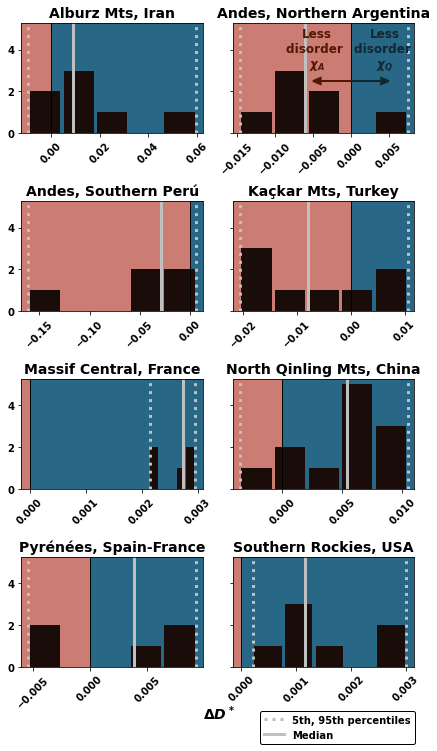

In [11]:
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

import matplotlib.font_manager as font_manager
import matplotlib.patches as mpatches
from matplotlib.ticker import FormatStrFormatter
#plt.rcParams['axes.xmargin'] = 0.0001
#plt.rcParams['axes.ymargin'] = 0

font = {'weight' : 'bold', 'size':8} 
plt.rc('font', **font) 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
font_dict = {'fontfamily': 'DejaVu Sans', 'size': 12, 'weight': 'bold'}
title_dict = {'fontfamily': 'DejaVu Sans', 'size': 14, 'weight': 'bold'}

q_color = cmc.berlin.colors[int(256/4)]
da_color =cmc.berlin.colors[int(-256/10)]
axes = all_grads_medians_df.hist(column='value', by='Mountains',   sharey=True,xrot=45, figsize=(6, 10), 
                                 layout=(4,2), bins= 5, sharex=False, 
                                 color=cmc.berlin.colors[int(256/2)], zorder=0, rwidth=0.9)

for ax, pos in zip(axes.flat, kde_mountain_95_order):
    ax.axvline(x=pos, color='silver', linestyle=':', ymax=ax.get_ylim()[1], zorder=0, lw = 3)
    ax.axvline(x=0, color='black', linestyle='-', ymax=ax.get_ylim()[1], zorder=0, lw = 1)
    ax.axvspan(0, ax.get_xlim()[1], 0, ax.get_ylim()[1],   facecolor=cmc.berlin.colors[int(256/4)], alpha=1, zorder=-10 )
    ax.axvspan(ax.get_xlim()[0], 0,0,  ax.get_ylim()[1], facecolor=cmc.berlin.colors[int(-256/10)], alpha=1, zorder = -10 )
    ax.set_title(ax.get_title(), fontdict=title_dict)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.margins(x=0)
for ax, pos in zip(axes.flat, kde_mountain_5_order):
    ax.axvline(x=pos, color='silver', linestyle=':', ymax=ax.get_ylim()[1], zorder=0, lw = 3)
    ax.set_ylabel(ax.get_ylabel(), fontsize='xx-large')
    ax.margins(x=0)
for ax, pos in zip(axes.flat, kde_mountain_median_order):
    ax.axvline(x=pos, color='silver', linestyle='-', ymax=ax.get_ylim()[1], lw = 3, zorder=0)

plt.tight_layout()
axes[0][1].arrow(0, 2.5, 0.005, 0, head_width=0.3, head_length=0.001, linewidth=2, color=cmc.berlin.colors[int(256/2.5)], length_includes_head=True)
axes[0][1].arrow(0, 2.5, -0.005, 0, head_width=0.3, head_length=0.001, linewidth=2, color=cmc.berlin.colors[int(-256/3)], length_includes_head=True)

axes[0][1].text(-0.0045,4, r'Less'+"\n"+ 'disorder '  +"\n"+r'$\bf{\it{\chi_{A}}}$', 
                ha='center', va='center', fontdict = font_dict, c= cmc.berlin.colors[int(-256/3)])
               #bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))
axes[0][1].text(0.0045,4, r'Less'+"\n"+ 'disorder ' +"\n"+ r'$\bf{\it{\chi_{Q}}}$',
                ha='center', va='center', fontdict = font_dict, c= cmc.berlin.colors[int(256/2.5)])
               #bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

extra_legend_elements = [
    Line2D([0], [0], color='silver', ls= ':', lw = 3, label="5th, 95th percentiles"),
    Line2D([0], [0], color='silver', ls= '-', lw = 3, label="Median")
]
font = font_manager.FontProperties(family= 'DejaVu Sans',  
                                   weight='bold',
                                   style='normal', size=10)

axes[-1][-1].legend(handles=extra_legend_elements,
                    bbox_to_anchor=(0.15, -0.7, 2,2),loc="lower left"
                    , borderaxespad=0, ncol=1, 
                    facecolor='white', edgecolor='black', 
                    framealpha=1, prop=font)
axes[-1][-1].text(-0.0004, -2.5, r'$\bf{\it{{\Delta D^*}}}$', ha='center', fontdict=title_dict)
#ax.set_xlabel(r'$\bf{\it{{\Delta D^*}}}$', fontdict=font_dict)
#mpl.rcParams['axes.prop_cycle'] = plt.cycler(color=cmc.hawaii)
#plt.colorbar(ScalarMappable(cmap=cmc.hawaii), ax=axes)

plt.savefig('histograms_real_landscapes_background.pdf', dpi = 400, bbox_inches = 'tight',pad_inches = 0)